# How to do Data Analysis using CRISP-DM approach?

In working with missing values, categorical variables, and building out your model, it was probably easy to lose sight of the big picture of the process. Let's take a quick second to recap that here, and pull together the results you should have arrived through your analysis.

    1. Business Understanding

    How do I break into the field?
    What are the placement and salaries of those who attended a coding bootcamp?
    How well can we predict an individual's salary? What aspects correlate well to salary?
    How well can we predict an individual's job satisfaction? What aspects correlate well to job satisfaction?
    2. Data Understanding

    Here we used the stackoverflow data to attempt to answer our questions of interest. We did 1. and 2. in tandem in this case, using the data to help us arrive at our questions of interest. This is one of two methods that is common in practice. The second method that is common is to have certain questions you are interested in answering, and then having to collect data related to those questions.

    3. Prepare Data

    This is commonly denoted as 80% of the process. You saw this especially when attempting to build a model to predict salary, and there was still much more you could have done. From working with missing data to finding a way to work with categorical variables, and we didn't even look for outliers or attempt to find points we were especially poor at predicting. There was ton more we could have done to wrangle the data, but you have to start somewhere, and then you can always iterate.

    4. Model Data

    We were finally able to model the data, but we had some back and forth with step 3. before we were able to build a model that had okay performance. There still may be changes that could be done to improve the model we have in place. From additional feature engineering to choosing a more advanced modeling technique, we did little to test that other approaches were better within this lesson.

    5. Results

    Results are the findings from our wrangling and modeling. 
    
    6. Deploy

    Deploying can occur by moving your approach into production or by using your results to persuade others within a company to act on the results. Communication is such an important part of the role of a data scientist.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#
import warnings
warnings.filterwarnings("ignore")


In [12]:
# Read data files for 2017 and 2018
survey_2017 = pd.read_csv("/Users/monikabagyal/Google Drive/Udacity/Practice_Notebooks/StackOverflow_DataAnalysis/datafiles/2017/survey_results_public.csv")
schema_2017 = pd.read_csv("/Users/monikabagyal/Google Drive/Udacity/Practice_Notebooks/StackOverflow_DataAnalysis/datafiles/2017/survey_results_schema.csv")



In [13]:
survey_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
schema_2017.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


# How other developers suggested breaking into the field (what education to pursue)?

### I believe CousinEducation feature can help to answer this question, let's find out.

In [15]:
print("What Information CousinEducation column holds?: \n\n",
      list(schema_2017[schema_2017['Column'] == 'CousinEducation']['Question']))




# Fixing Missing Values
education=survey_2017[['CousinEducation']].fillna('No Answer')

education=survey_2017[['CousinEducation']]


education=education.dropna()

final_list = []
for item in list(education.CousinEducation):
    final_list.append(item.split(';'))
education=pd.DataFrame(final_list)

education.columns = ['col1','col2','col3', 'col4']

education = pd.DataFrame(list(education['col1']) + list(education['col2']) 
                         + list(education['col3']) + list(education['col3']))


education.columns = ['method']
#ed_df1.value_counts()

#education.method.value_counts()

education['method'] = education['method'].apply(lambda x: str(x).strip())
education = education[education['method'] != 'None']
education.head()

What Information CousinEducation column holds?: 

 ["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how t

,method
0,Get a job as a QA tester
1,Get a job as a QA tester
2,Take online courses
3,Contribute to open source
4,Take online courses


### Survey Results : Suggestions on how to break into field

,method,percentage
Take online courses,15967,0.203362
Buy books and work through the exercises,11775,0.149971
Part-time/evening courses,10292,0.131083
Contribute to open source,8606,0.109610
Bootcamp,6763,0.086136
Return to college,5017,0.063899
Participate in online coding competitions,4644,0.059148
Participate in hackathons,3787,0.048233
Get a job as a QA tester,3461,0.044081
Conferences/meet-ups,2996,0.038158


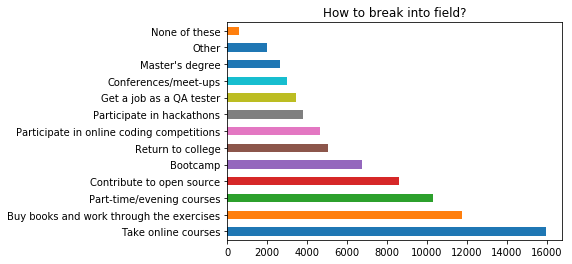

In [16]:
ed_count = pd.DataFrame(education.method.value_counts())
ed_count['percentage'] = ed_count['method']/education.shape[0]
ed_count['method'].plot(kind='barh', title='How to break into field?');
ed_count

In [17]:
ed_count.head()

,method,percentage
Take online courses,15967,0.203362
Buy books and work through the exercises,11775,0.149971
Part-time/evening courses,10292,0.131083
Contribute to open source,8606,0.109610
Bootcamp,6763,0.086136


In [18]:
temp = ed_count.head()['method']
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
  
fig = {
  "data": [
    {
      "values": df['values'],
      "labels": df['labels'],
      "domain": {"column": 0},
      "hoverinfo":"label+value",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"How other developers suggested breaking into the field?\nTop Five Categories.",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {"size": 13},
                "showarrow": False,
                "text": "Total Respondents",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='field_ring.png')

In [19]:
def draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity):
    trace = go.Bar(
        x = var_x,
        y = var_y,
        marker=dict(
            color = (var_color),           
            reversescale = True
        ), opacity=var_opacity
    )
    data = [trace]
    layout = go.Layout(
        title = var_title,
        xaxis=dict(
            title=var_xticks,
            tickfont=dict(
                size=11
                ,color='rgb(107, 107, 107)'
            )
        ),
        yaxis=dict(
            title=var_yticks,
            titlefont=dict(
                size=16,
                color='rgb(107, 107, 107)'
            ),
            tickfont=dict(
                size=14
                ,color='rgb(107, 107, 107)'
            )
    )
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename=var_filename)


In [20]:
df = ed_count['percentage']
df = df.reset_index()
df.columns = ['labels', 'values']
df = df[df['values'] > 0]
df['values'] = df['values']*100

var_title = "How did other developers suggest breaking into the field (what education to pursue)?"
var_x = df['labels']
var_y = df['values']
var_xticks='Response Category'
var_yticks='Respondent %'
var_filename='field_barchart.png'
var_color='green'
var_opacity = 0.8
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)

#### All respondents highly suggest that taking online courses helps to enter the field and second most reccommended is buying books and working through the exercises.

# What factors about an individual contributed to salary?
## Now Let's See what "people with salary" suggest

,method,percentage
Take online courses,4493,0.210356
Buy books and work through the exercises,3393,0.158856
Contribute to open source,2253,0.105482
Part-time/evening courses,2117,0.099115
Conferences/meet-ups,1677,0.078515
Bootcamp,1622,0.075940
Return to college,1474,0.069011
Get a job as a QA tester,1032,0.048317
Participate in online coding competitions,931,0.043588
Participate in hackathons,796,0.037268


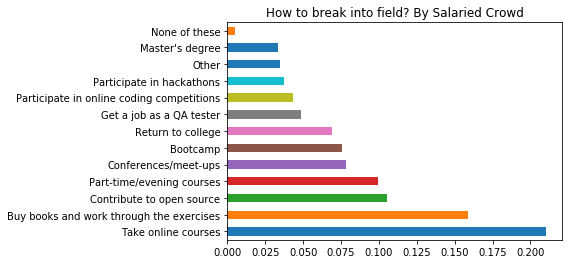

In [21]:
salaried_crowd = survey_2017[survey_2017['Salary'] > 0][['CousinEducation', 'Salary']]

salaried_crowd=salaried_crowd.dropna()


sal_group=salaried_crowd.groupby('CousinEducation')



final_list = []
for item in list(salaried_crowd.CousinEducation):
    final_list.append(item.split(';'))
education=pd.DataFrame(final_list)

education.columns = ['col1','col2','col3', 'col4']

education = pd.DataFrame(list(education['col1']) + list(education['col2']) 
                         + list(education['col3']) + list(education['col4']))


education.columns = ['method']
#ed_df1.value_counts()

#education.method.value_counts()

education['method'] = education['method'].apply(lambda x: str(x).strip())
education = education[education['method'] != 'None']



n=salaried_crowd.shape[0]
counter = 0
temp_list = []
while n > counter:
    a=list(salaried_crowd.iloc[counter])
    b=a[-1]
    c=list(a[0].split(';'))
    temp_list.append([b,c])
    counter +=1
    


df_salary = pd.DataFrame(temp_list)

df_salary.columns = ['Salary', 'Method']

df_salaried_crowd = pd.DataFrame(list(df_salary.Method))

df_salaried_crowd.columns = ['col1','col2','col3', 'col4']

df_salaried_crowd = pd.DataFrame(list(df_salaried_crowd['col1']) + 
                                 list(df_salaried_crowd['col2']) + 
                                 list(df_salaried_crowd['col3']) + 
                                 list(df_salaried_crowd['col4']))

df_salaried_crowd.columns = ['method']

df_salaried_crowd['method'] = df_salaried_crowd['method'].apply(lambda x: str(x).strip())
df_salaried_crowd = df_salaried_crowd[df_salaried_crowd['method'] != 'None']



df_salaried_crowd = df_salaried_crowd[df_salaried_crowd['method'] != 'None']

ed_count1 = pd.DataFrame(df_salaried_crowd.method.value_counts())
ed_count1['percentage'] = ed_count1['method']/df_salaried_crowd.shape[0]
ed_count1['percentage'].plot(kind='barh', title='How to break into field? By Salaried Crowd');
ed_count1

In [22]:
df = ed_count1['percentage']
df = df.reset_index()
df.columns = ['labels', 'values']
df = df[df['values'] > 0]
df['values'] = df['values']*100

var_title = "Suggestions by Salaried People on 'How to Break into Field?'"
var_x = df['labels']
var_y = df['values']
var_xticks='Suggestions Category'
var_yticks='Respondent %'
var_filename='fieldSalary_barchart.png'
var_color='orange'
var_opacity = 0.8
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)

#### People with salary highly suggest that taking online courses helps to enter the field and second most reccommended is buying books and working through the exercises.

# What was the state of bootcamps for assisting individuals with breaking into developer roles?

# Let's look at bootcamp graduate

In [23]:
bootcamp_no = survey_2017[survey_2017['TimeAfterBootcamp'].isnull()==True]
bootcamp_yes = survey_2017[survey_2017['TimeAfterBootcamp'].isnull()==False]

print("People With Bootcamp experience:",bootcamp_yes.shape[0])
#print("People without Bootcamp experience:",bootcamp_no.shape[0])

#bootcamp_yes['Gender'].value_counts()/(bootcamp_yes.shape[0]-sum(bootcamp_yes['Gender'].isnull()))
#bootcamp_no['Gender'].value_counts()/(bootcamp_no.shape[0]-sum(bootcamp_no['Gender'].isnull()))

bootcamp_Edu = bootcamp_yes['FormalEducation'].value_counts()/(bootcamp_yes.shape[0]-sum(bootcamp_yes['FormalEducation'].isnull()))

#bootcamp_no['FormalEducation'].value_counts()/(bootcamp_no.shape[0]-sum(bootcamp_no['FormalEducation'].isnull()))

bootcamp_JobStatus = bootcamp_yes['TimeAfterBootcamp'].value_counts()/bootcamp_yes.shape[0]



bootcamp_yes[bootcamp_yes['FormalEducation'].isin(["Bachelor's degree", "Master's degree"])][
    ['TimeAfterBootcamp', 'FormalEducation', 'Respondent']].groupby(['TimeAfterBootcamp', 'FormalEducation']).count()

#bootcamp_yes[['TimeAfterBootcamp', 'FormalEducation', 'Salary']].groupby(['TimeAfterBootcamp', 'FormalEducation']).count()



People With Bootcamp experience: 2602


Respondent
TimeAfterBootcamp                                  FormalEducation              
Four to six months                                 Bachelor's degree          61
                                                   Master's degree            15
I already had a job as a developer when I start... Bachelor's degree         513
                                                   Master's degree           335
I got a job as a developer before completing th... Bachelor's degree         118
                                                   Master's degree            56
I haven't gotten a job as a developer yet          Bachelor's degree          69
                                                   Master's degree            24
Immediately upon graduating                        Bachelor's degree         173
                                                   Master's degree            63
Less than a month                                  Bachelor's degree          94
                                                   Master's degree            17
Longer than a year                                 Bachelor's degree          34
                                                   Master's degree            17
One to three months                                Bachelor's degree         133
                                                   Master's degree            44
Six months to a year                               Bachelor's degree          41
                                                   Master's degree            15

In [24]:
df = bootcamp_JobStatus
df = df.reset_index()
df.columns = ['labels', 'values']
df = df[df['values'] > 0]
df['values'] = df['values']*100
var_title = "How long it took for Individuals to get a job after bootcamps ?"
var_x = df['labels']
var_y = df['values']
var_xticks='Status Category'
var_yticks='Respondent %'
var_filename='fieldSalary_barchart.png'
var_color='red'
var_opacity = 0.8
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)


In [25]:
df = bootcamp_Edu
df = df.reset_index()
df.columns = ['labels', 'values']
df = df[df['values'] > 0]
df['values'] = df['values']*100
var_title = "What was the state of bootcamps for assisting individuals with breaking into developer roles?"
var_x = df['labels']
var_y = df['values']
var_xticks='Education Category'
var_yticks='Respondent %'
var_filename='fieldSalary_barchart.png'
var_color='blue'
var_opacity = 0.8
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)


In [26]:
# How were bootcamps assisting with increasing diversity in tech careers?

#bootcamp_yes['DeveloperType'].value_counts()

#bootcamp_yes[['DeveloperType', 'TimeAfterBootcamp']]
#sns.boxplot(x='Salary' , y='TimeAfterBootcamp',data=bootcamp_yes['Salary', 'TimeAfterBootcamp'])

#bootcamp_yes['Salary', 'TimeAfterBootcamp']

#ax = sns.catplot(x='Salary', y='TimeAfterBootcamp',data=bootcamp_yes[['Salary', 'TimeAfterBootcamp','ProgramHobby']], height=9, kind="bar", hue='ProgramHobby');


var_DevType = bootcamp_yes[['DeveloperType', 'TimeAfterBootcamp']].dropna()

var_group=var_DevType.groupby('TimeAfterBootcamp')



final_list = []
for item in list(var_DevType.DeveloperType):
    final_list.append(item.split(';'))
DevType=pd.DataFrame(final_list)

c = 0
dlist = []
while c<DevType.shape[1]:
    column_name = 'c' + str(c)
    dlist.append(column_name)
    c+=1


DevType.columns = dlist.copy()

df_DevType = pd.DataFrame(list('x'))
df_DevType.columns = ['dummy_column']
df_DevType = df_DevType.drop(index=0)

for item in dlist:
    df_DevType = df_DevType.append(DevType[[item]])


df_DevType = df_DevType.drop(columns='dummy_column', axis=1)
df_DevType = df_DevType.fillna('')
df_DevType = df_DevType.reset_index(drop=True)

dlist = list(df_DevType.columns)
col_DevType = ''#df_DevType[dlist[0]].copy()

for item in dlist:
    col_DevType +=df_DevType[item]
    
    
df_DevType['Developer_Type'] = col_DevType
df_DevType = df_DevType[['Developer_Type']]    
    
    
df_DevType['Developer_Type'] = df_DevType['Developer_Type'].str.strip()
df_DT = pd.DataFrame(df_DevType.Developer_Type.value_counts())[1:]
total_count = np.sum(df_DT)
df_DT

,Developer_Type
Web developer,1547
Desktop applications developer,599
Mobile developer,518
Database administrator,351
DevOps specialist,291
Developer with a statistics or mathematics background,247
Data scientist,227
Systems administrator,224
Other,193
Embedded applications/devices developer,182


In [27]:
df = df_DT/total_count
df = df.reset_index()
df.columns = ['labels', 'values']
df = df[df['values'] > 0]
df['values'] = df['values']
var_title = "How were bootcamps assisting with increasing diversity in tech careers?"
var_x = df['labels']
var_y = df['values']
var_xticks='Developer Role Category'
var_yticks='Respondent %'
var_filename='fieldSalary_barchart.png'
var_color='purple'
var_opacity = 0.8
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)



# Job Satisfaction

In [28]:
survey_2017.groupby(['EmploymentStatus']).mean()  

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
EmploymentStatus,,,,,,,
Employed full-time,25460.978754,7.354600,6.926805,3.414092,8.462971,57353.913736,32580.700110
Employed part-time,25938.816667,7.169207,6.821468,3.903614,8.408229,26916.356606,39812.927903
I prefer not to say,25247.449355,6.463977,NaN,6.081560,8.142241,NaN,34603.136570
"Independent contractor, freelancer, or self-employed",26489.220715,7.453691,7.252823,4.332516,8.392894,NaN,32486.817981
"Not employed, and not looking for work",25317.321390,6.662100,7.000000,2.515933,8.322013,NaN,34795.438566
"Not employed, but looking for work",27485.405958,5.215962,NaN,8.537255,8.269520,NaN,26943.820755
Retired,26629.904762,7.625899,NaN,7.446809,7.295455,NaN,15151.515152


## According to EmploymentStatus, which group has the highest average job satisfaction?

In [29]:
df = survey_2017.groupby(['EmploymentStatus']).mean()['JobSatisfaction']
df = df.reset_index()
df.columns = ['labels', 'values']
df = df[df['values'] > 0]
df['values'] = df['values']
var_title = "Employment Status vs. Average Job satisfaction?"
var_x = df['labels']
var_y = df['values']
var_xticks='Employment Status'
var_yticks='Respondent %'
var_filename='fieldSalary_barchart.png'
var_color='black'
var_opacity = 0.4
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)



## According to EmploymentStatus, which group has the highest average Career satisfaction?

In [30]:
df = survey_2017.groupby(['EmploymentStatus']).mean()['CareerSatisfaction']
df = df.reset_index()
df.columns = ['labels', 'values']
df = df[df['values'] > 0]
df['values'] = df['values']
var_title = "Employment Status vs. Average Career satisfaction"
var_x = df['labels']
var_y = df['values']
var_xticks='Employment Status'
var_yticks='Respondent %'
var_filename='fieldSalary_barchart.png'
var_color='brown'
var_opacity = 0.5
draw_barchart(var_x,var_y,var_xticks, var_yticks, var_title, var_filename, var_color, var_opacity)




In [31]:
## How bias played a role in the suggestions of developers for - how to break into the field?